# Testaufgabe - Satzlängenanalyse mit SpaCy

Wir arbeiten mit Texten. Unser Ziel ist es, Texte zu analysieren und zu bewerten.

Es gibt sehr viele Möglichkeiten einen Text zu bewerten oder zu charakterisieren. Eine recht einfache Methode ist die Analyse von Satzlängen in einem Text.

Um einzelne Sätz in einem Text zu erkennen nutzen wir [SpaCy](https://spacy.io/).

#### Beispieltext:

In [22]:
text = """
    Clean Code ist ein Begriff aus der Softwaretechnik, der seinen Ursprung im gleichnamigen Buch von Robert Cecil Martin hat. 
    Als „sauber“ bezeichnen Softwareentwickler in erster Linie Quellcode, aber auch Dokumente, Konzepte, Regeln und Verfahren, 
    die intuitiv verständlich sind. Als intuitiv verständlich gilt alles, was mit wenig Aufwand und in kurzer Zeit richtig 
    verstanden werden kann. Vorteile von Clean Code sind stabilere und effizient wartbarere Programme, d. h. kürzere 
    Entwicklungszeiten bei Funktionserweiterung und Fehlerbehebungen. Die Bedeutung wächst mit der Beobachtung, 
    dass im Schnitt 80 % der Lebensdauer einer Software auf den Wartungszeitraum entfällt.
    Die Notwendigkeit, Code noch nach der Entwicklung von „unsauberen“ Stellen zu reinigen, wird häufig nicht 
    gesehen oder vom Management nicht bewilligt, sobald das Programm seine vorgesehene Funktion ausübt. 
    Ein direktes Schreiben von „sauberem“ Code ist nahezu unmöglich, kann jedoch durch den bewussten Umgang 
    mit den Prinzipien und Praktiken von Clean Code verbessert werden.
"""

#### Aufgabe
* Ergänze das Notebook
* Analysiere den Beispieltext auf die Verteilung der Satzlängen im Text
* Die Auswertung des Ergebnis sollte auch mit Spacy visualisiert werden
* Das Ergebnis sollte – im Hinblick auf andere Teammitglieder – einfach und verständlich dargestellt werden. Das betrifft den Code und die Darstellung des Ergebnis im Notebook
* Das Ergebnis sollte es anderen ermöglichen darauf aufzubauen und damit weiter zu arbeiten.
* Es kommt hier nicht auf Geschwindigkeit an
* Natürlich können auch andere Python-Module verwendet werden (pandas, numpy, etc.)

Bei Fragen kannst Du mich gerne per Mail oder Telefon erreichen
* mail tc@cvt-engineering.de
* fon 030/64464933

---

## Lösung

### Install SpaCy and Download German statistical model

In [2]:
pip install -U spacy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import spacy
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
spacy.cli.download("de_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


### Get individual sentences in the example text

In [27]:
spacy_de = spacy.load("de_core_news_sm")
doc = spacy_de(text)
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.noun_chunks]
#sentences = [sent.text for sent in doc.sents]

In [28]:
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
sup_ent = spayc.tokens.Span(doc, 0, 1, label = ;)

In [5]:
sentences
type(sentences)

list

### Define a function to preprocess the sentences
Here, I excluded the stemming nor lemmatization as I thought they were unnecessary for this task.


In [5]:
lst_stopwords = nltk.corpus.stopwords.words("german")

'''
parameter:
    text: a list of sentences
    lst_stopwords: a list of German stopwords to remove
return:
    cleansed text
'''

def preprocess_text(text):
    ## clean: convert to lowercase, remove punctunations and characters
    text_cleansed = re.sub(r'[^\w\s]','',str(text).lower())
    
    ## tokenize
    tokens = text_cleansed.split()
    
    ## remove stopwords
    tokens_sw_removed = [word for word in tokens if word not in lst_stopwords]  
 
    ## back to string from list
    text = " ".join(tokens_sw_removed)
    
    return text


### Creat a dataframe and analyze the sentence length

In [8]:
dtf = pd.DataFrame(sentences, columns=['sentences'])
dtf['len_sents'] = [len(token) for token in sentences]
dtf

,sentences,len_sents
0,\n Clean Code ist ein Begriff aus der Softw...,127
1,\n Als „sauber“ bezeichnen Softwareentwickl...,164
2,"Als intuitiv verständlich gilt alles, was mit ...",115
3,Vorteile von Clean Code sind stabilere und eff...,159
4,"Die Bedeutung wächst mit der Beobachtung, \n ...",133
5,"\n Die Notwendigkeit, Code noch nach der En...",215
6,\n Ein direktes Schreiben von „sauberem“ Co...,180
7,\n,1


In [ ]:

'''sentence length categorize:
top33.3 long
bottom33.3 short
between33.3 normal
vs
less than XX: short
longer than YY: long
??
'''

#categories
sht = short
mid = middle
lng = long
label_dict = {}


In [ ]:
sent_max_len = max([len(s) for s in sentences]) #compute length of longest sentence in sample sentences

In [10]:
doc = spacy_de("Suprdaily began its journey in the suburbs of Mumbai")
print(doc)
type(doc)

Suprdaily began its journey in the suburbs of Mumbai


spacy.tokens.doc.Doc

In [12]:
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents ] 
print(ents)

[('Suprdaily began', 0, 15, 'PER'), ('journey', 20, 27, 'ORG'), ('the suburbs of Mumbai', 31, 52, 'MISC')]


In [9]:
dtf['cleansed_sents'] = [preprocess_text(text) for text in sentences]
dtf['len_cleansed_sents'] = [len(preprocess_text(text)) for text in sentences]
dtf['word_count'] = dtf['cleansed_sents'].apply(lambda x: len(str(x).split(" ")))
dtf['char_count'] = dtf['cleansed_sents'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dtf

,sentences,len_sents,cleansed_sents,len_cleansed_sents,word_count,char_count
0,\n Clean Code ist ein Begriff aus der Softw...,127,clean code begriff softwaretechnik ursprung gl...,82,10,73
1,\n Als „sauber“ bezeichnen Softwareentwickl...,164,sauber bezeichnen softwareentwickler erster li...,117,12,106
2,"Als intuitiv verständlich gilt alles, was mit ...",115,intuitiv verständlich gilt wenig aufwand kurze...,71,9,63
3,Vorteile von Clean Code sind stabilere und eff...,159,vorteile clean code stabilere effizient wartba...,129,13,117
4,"Die Bedeutung wächst mit der Beobachtung, \n ...",133,bedeutung wächst beobachtung schnitt 80 lebens...,86,9,78
5,"\n Die Notwendigkeit, Code noch nach der En...",215,notwendigkeit code entwicklung unsauberen stel...,138,15,124
6,\n Ein direktes Schreiben von „sauberem“ Co...,180,direktes schreiben sauberem code nahezu unmögl...,116,14,103
7,\n,1,,0,1,0


### Visualize the distribution of sentence length before/ after preprocessing

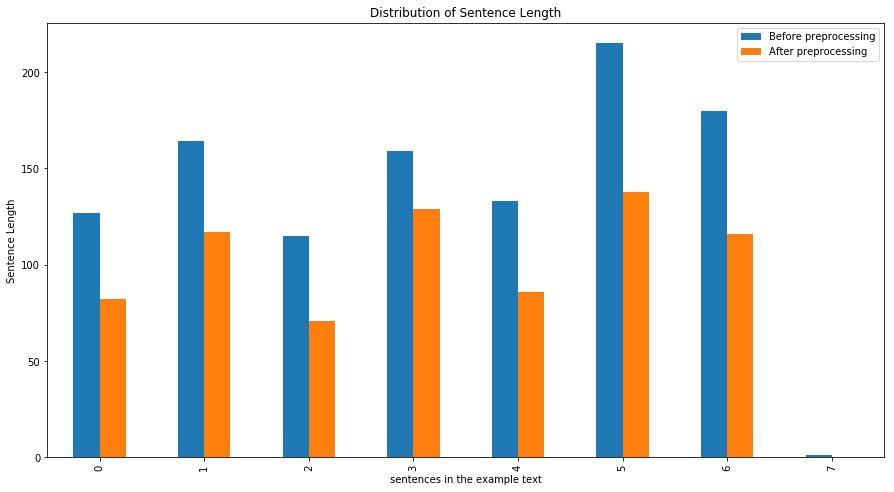

In [16]:
fig, ax = plt.subplots(figsize = (15,8))
dtf.plot(y = ['len_sents', 'len_cleansed_sents'], 
         kind ='bar', 
         ax=ax)
plt.xlabel("sentences in the example text")
plt.ylabel("Sentence Length")
plt.title("Distribution of Sentence Length")
ax.legend(["Before preprocessing", "After preprocessing"])